In [136]:
from keras import applications
from keras.applications.resnet50 import preprocess_input

In [137]:
import pandas as pd
import numpy as np

import csv
import matplotlib.pyplot as plt
%matplotlib inline


In [138]:
tsne_df = pd.read_csv('tsne_features.csv')

In [197]:
list(tsne_df[tsne_df['cluster']==-1]['id'])

[1443, 3959]

In [140]:
# list(tsne_df[tsne_df['cluster']==8]['id'])

In [141]:
# tsne_df[tsne_df['id']==637]

------

## KMeans

In [143]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [144]:
scaler = StandardScaler()
X = np.array(tsne_df[['x', 'y']])

cluster_range = list(range(3,15))
for cl in cluster_range:
    kmeans = KMeans(cl, random_state=0)
    cl_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cl_labels)
    print('no. of cluster: ', cl, ', score: ', silhouette_avg)
    
    silhouette_values = silhouette_samples(X, cl_labels)

no. of cluster:  3 , score:  0.4600027351873407
no. of cluster:  4 , score:  0.5320729677997921
no. of cluster:  5 , score:  0.5651980853473855
no. of cluster:  6 , score:  0.5883014147439732
no. of cluster:  7 , score:  0.5927701765926213
no. of cluster:  8 , score:  0.6164573758683165
no. of cluster:  9 , score:  0.6363263160787542
no. of cluster:  10 , score:  0.6166168060280917
no. of cluster:  11 , score:  0.581146875150207
no. of cluster:  12 , score:  0.5477145669426615
no. of cluster:  13 , score:  0.5421980498985813
no. of cluster:  14 , score:  0.5337281272025566


**KMeans** suggests 9 clusters to be optimum, which we'll confirm with **DBSCAN** as well.

## DBSCAN

We'll be estimating best `epsilon` and `min_samples` for **DBSCAN**

In [146]:
range_eps = np.arange(0.1, 0.51, 0.01)

for i in range_eps:
    db = DBSCAN(eps=i, min_samples=5).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    if len(np.unique(labels)) == 1:
        print()
        continue
    silhouette_avg = silhouette_score(X, labels)
    print('eps: ' + str(i), '\nunique labels: ', np.unique(labels), '\navg silhouette score: ', silhouette_avg)
    print()

{-1}

{-1}

{-1}

{-1}

{-1}

{-1}

{-1}

{-1}

{0, -1}
eps: 0.17999999999999997 
unique labels:  [-1  0] 
avg silhouette score:  0.064981401682761

{0, 1, -1}
eps: 0.18999999999999995 
unique labels:  [-1  0  1] 
avg silhouette score:  -0.08374194386157154

{0, 1, 2, 3, -1}
eps: 0.19999999999999996 
unique labels:  [-1  0  1  2  3] 
avg silhouette score:  -0.1496081564345355

{0, 1, 2, 3, -1}
eps: 0.20999999999999996 
unique labels:  [-1  0  1  2  3] 
avg silhouette score:  -0.14917053543035025

{0, 1, 2, 3, -1}
eps: 0.21999999999999995 
unique labels:  [-1  0  1  2  3] 
avg silhouette score:  -0.14917053543035025

{0, 1, 2, 3, -1}
eps: 0.22999999999999995 
unique labels:  [-1  0  1  2  3] 
avg silhouette score:  -0.14872013537896867

{0, 1, 2, 3, -1}
eps: 0.23999999999999994 
unique labels:  [-1  0  1  2  3] 
avg silhouette score:  -0.14872013537896867

{0, 1, 2, 3, -1}
eps: 0.24999999999999992 
unique labels:  [-1  0  1  2  3] 
avg silhouette score:  -0.14872013537896867

{0, 1, 2, 

Since we have maximum silhouette score for `epsilon=0.18`, taking this value into account, next we'll find `min_smaples` to consider while clustering.

In [ ]:
min_samples_range = list(range(3,15))
for i in min_samples_range:
    db = DBSCAN(eps=0.18, min_samples=i).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = set([label for label in db.labels_ if label>=0])
#     labels = db.labels_
    print(set(labels))
    print('min sample value: ', i)
    print('no.of clusters: ', str(len(set(labels))))
    print()

**DBSCAN** suggests `min_samples=4` which will yield 10 clusters which is around the same suggested by KMeans. 

Thus, taking `eps=0.181 and `min_smaples=4` for **DBSCAN**, we'll plot the samples.

{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
Estimated number of clusters:  10
Estimated number of outlier points:  2


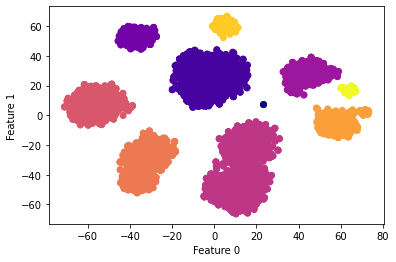

In [148]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X = np.array(tsne_df[['x', 'y']])
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.18, min_samples = 4)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


db = DBSCAN(eps=.18, min_samples=4).fit(X_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(set(labels))

n_clusters = len(set(labels))
n_noise = list(labels).count(-1)

print('Estimated number of clusters: ', n_clusters)
print('Estimated number of outlier points: ', n_noise)

In [149]:
tsne_df['cluster'] = clusters
tsne_df.to_csv('tsne_clusters.csv')

----